In [1]:
import sys
sys.path.append('../../src/utils/')

from galenv import *

from astroquery.irsa import Irsa
Irsa.ROW_LIMIT = 5000

%matplotlib inline

In [2]:
def plot_cone(coord, theta, res, xSize=7.5, ySize=7.5, title='', show=True, savefig=False, imgname="plot.png"):
        '''Only cone
        coord = astropy coordinates
        theta = Cone angle
        res = result catalog
        '''
        ra = coord.ra.value
        dec = coord.dec.value

        fig = plt.figure(figsize=(xSize, ySize))        
        gs = gridspec.GridSpec(1, 1)
        
        ax = plt.subplot(gs[0])
        # ax.axis('equal')
        limangle = 1.5*theta
        ax.set_xlim((ra-limangle, ra+limangle))
        ax.set_ylim((dec-limangle, dec+limangle))
        
        # Central position/object
        ax.plot(ra, dec, 'ro', alpha=0.5)
        
        # Catalog object
        ax.plot(res['ra'], res['dec'], 'k.')
        
        plt.gca().invert_xaxis() # RA from E to W
        ax.set_xlabel('RA (deg)')
        ax.set_ylabel('DEC (deg)')
        plt.title(title)

        # Circle
        # it is wrong if I draw a circle around (ra, dec) with radius theta
        # due to small circle in celestial sphere for DEC
        circle = plt.Circle((ra, dec), theta, fc='none', ec='black')
        ax.add_artist(circle)
        
        fig.tight_layout()

        if savefig:
            plt.savefig(imgname)

        if show:
            plt.show()

        plt.close()
        


In [3]:
ga = Galenv()

## Check using name

WISE J161021.87-395858.4
0.518 155293.0 242.59116 -39.98287
1321.2981017765974 0.3252243727364208


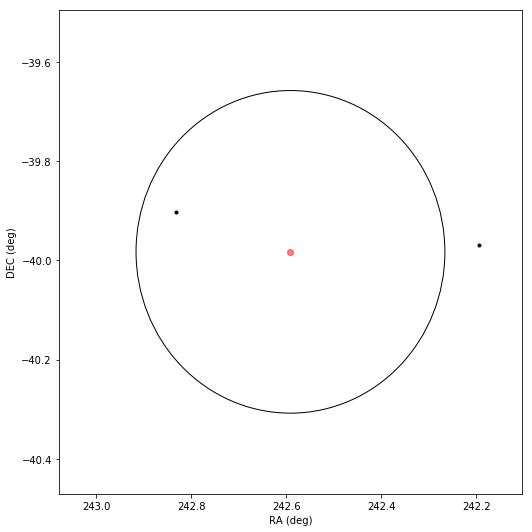

----
[HB89] 1741-038
1.054 315981.0 265.99523 -3.83462
1717.70727627639 0.2501697188357098


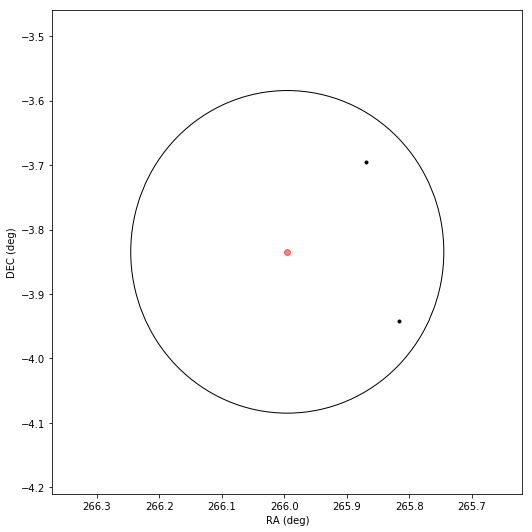

----
3C 454.3
0.859 257522.0 343.49062 16.14821
1629.9307676687627 0.2636420852173554


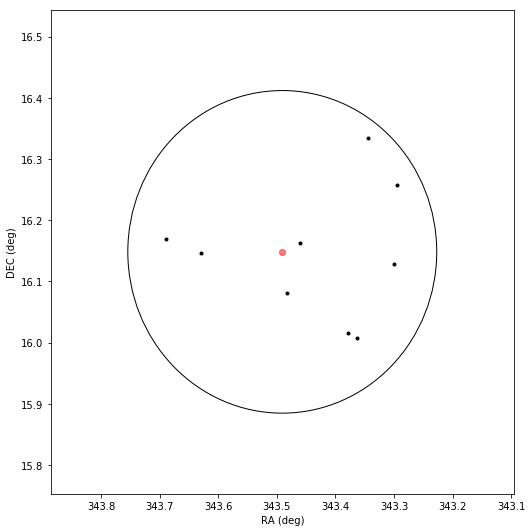

----
PKS 0539-057
0.839 251526.0 85.40868 -5.69706
1618.0605034352159 0.26557619164166346


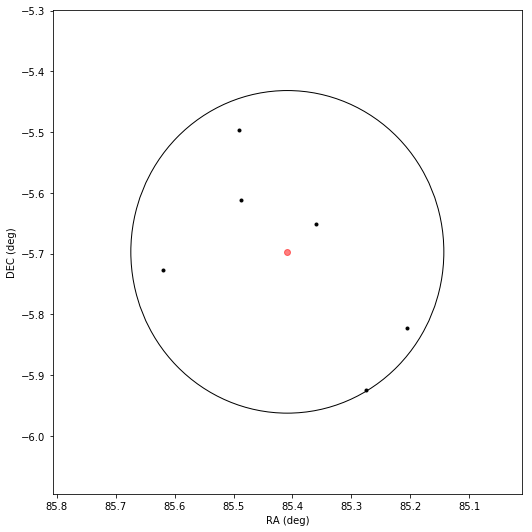

----
PKS 0601-70
2.409 722200.0 90.29717 -70.60239
1719.5229114516012 0.2499055659487283


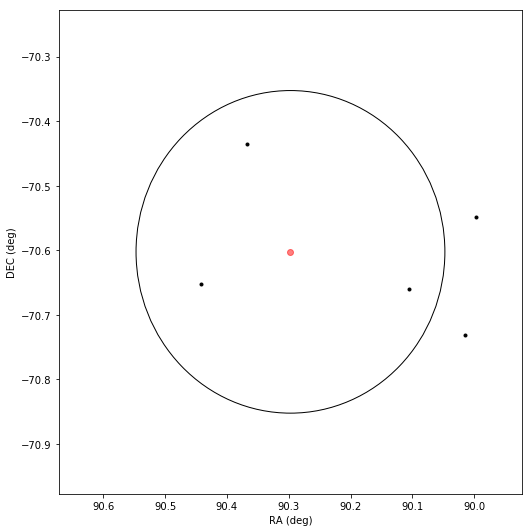

----
SSTSL2 J113006.83-144912.6
0.95 284803.0 172.52828 -14.82011
1676.7426585476921 0.2562816328179527


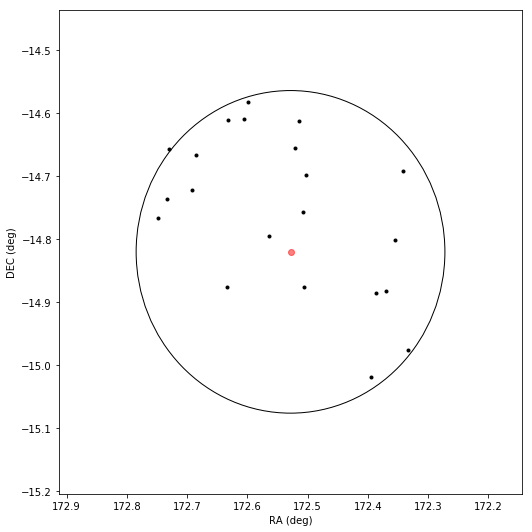

----
NGC 4945
0.001878 563.0 196.36449 -49.46821
8.292149410020395 51.822311092083964
error! maybe can not identify from name
----
[HB89] 0333+321 ABS01
0.9532 285762.0 54.12516 32.30815
1678.189933316063 0.2560606149621004


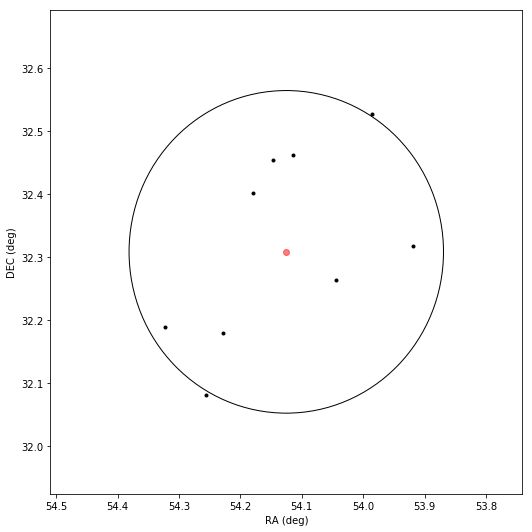

----
PKS 0003-066
0.346676 103931.0 1.55789 -6.39315
1044.0300496957655 0.41159576438756634


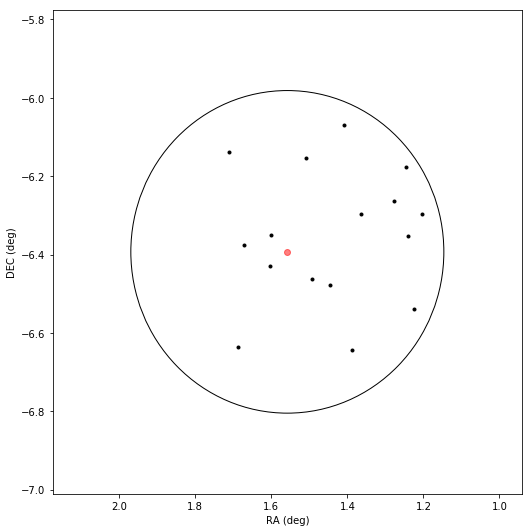

----
PKS 1830-21
2.507 751580.0 278.4162 -21.06105
1705.1650629156973 0.25200982338526984


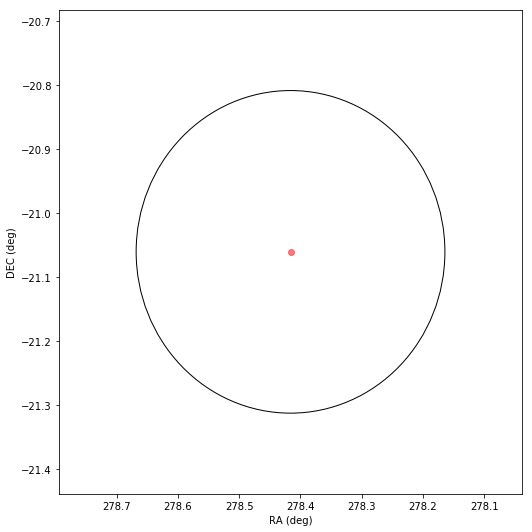

----
[HB89] 0234+285
1.213 363648.0 39.46836 28.8025
1759.843219104895 0.2441799028931021


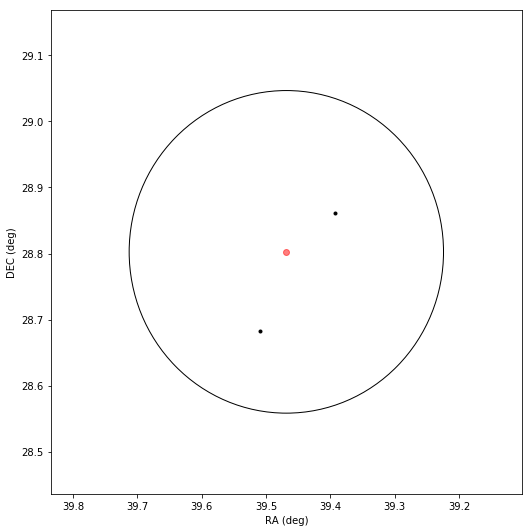

----
[HB89] 0748+126
0.889 266516.0 117.71686 12.51801
1646.623423400248 0.26096941185298866


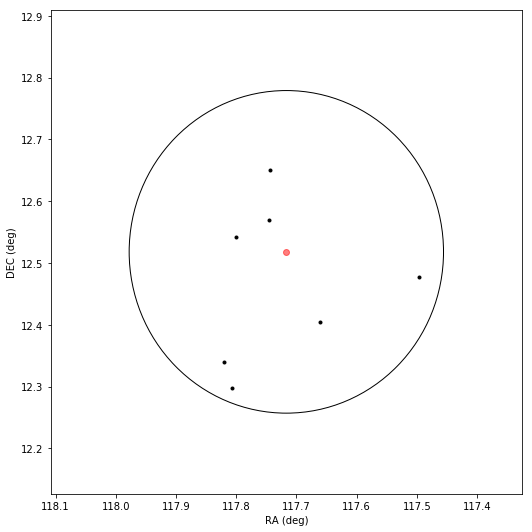

----
[HB89] 1749+096
0.322 96533.0 267.88674 9.6502
994.3201278022433 0.43217303394826034


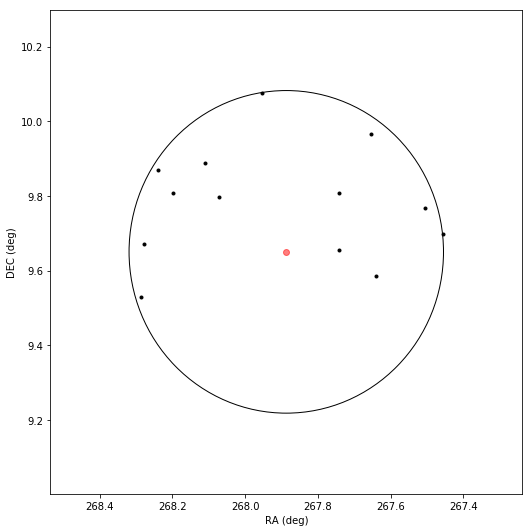

----
WISE J094857.31+002225.6
0.585102 175409.0 147.23883 0.37377
1403.290777152521 0.30622188454774696


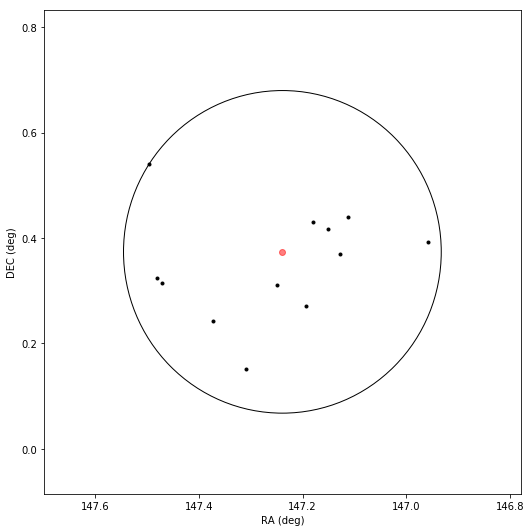

----
[HB89] 1104-445
1.598 479068.0 166.78622 -44.81877
1793.3027653878596 0.2396239802012333


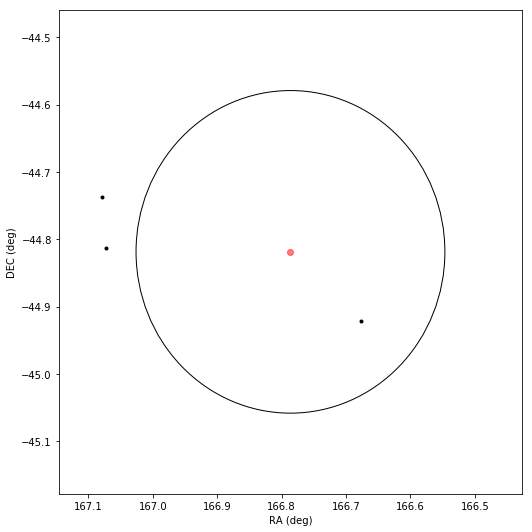

----
3C 279
0.5362 160749.0 194.04653 -5.78931
1344.817110605312 0.3195366440234375


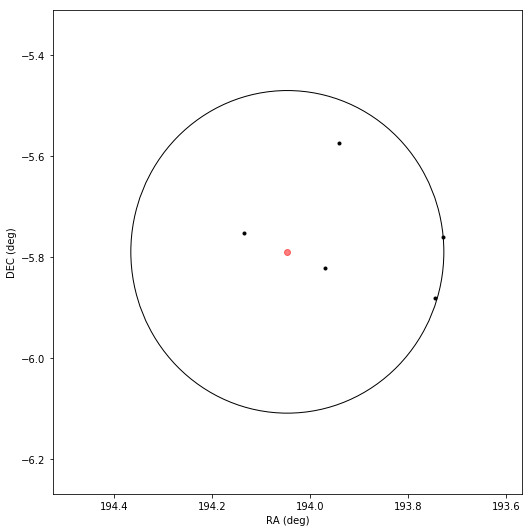

----
WISE J183005.92+061915.7
0.745 223345.0 277.52475 6.3211
1553.4923551806653 0.27661439395892157


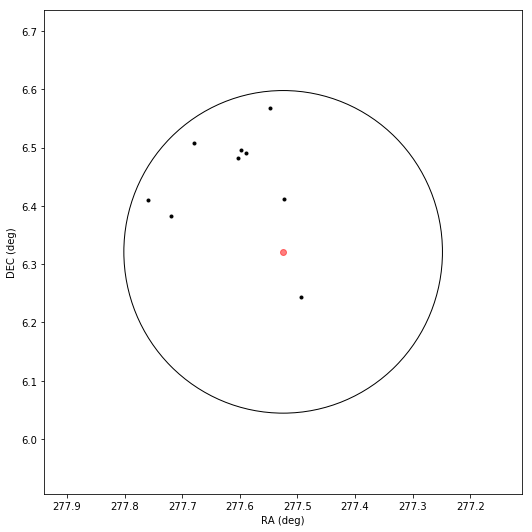

----
MESSIER 084
0.003392 1017.0 186.2656 12.88698
14.949233862918131 28.745175190150867
error! maybe can not identify from name
----
[HB89] 1514+197
1.07 320778.0 229.23665 19.53694
1722.9801220862478 0.24940412303062362


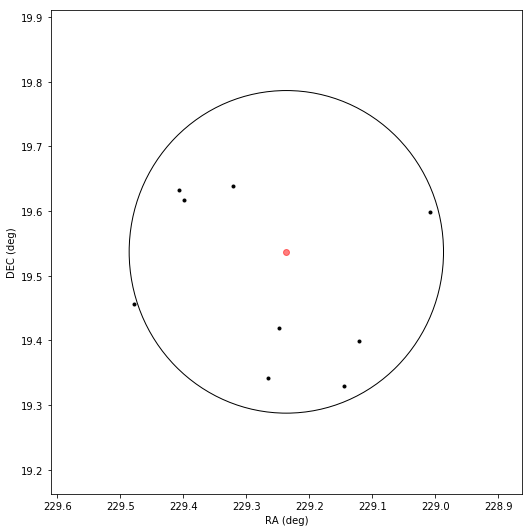

----
LQAC 069+030 001
1.454 435898.0 69.52062 30.07931
1789.4637633558145 0.24013805428630675


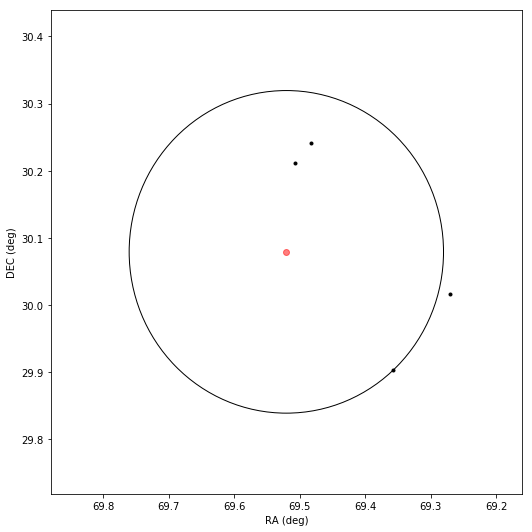

----
[HB89] 2131-021
1.285 385233.0 323.54296 -1.88812
1772.3854802599205 0.2424519672126287


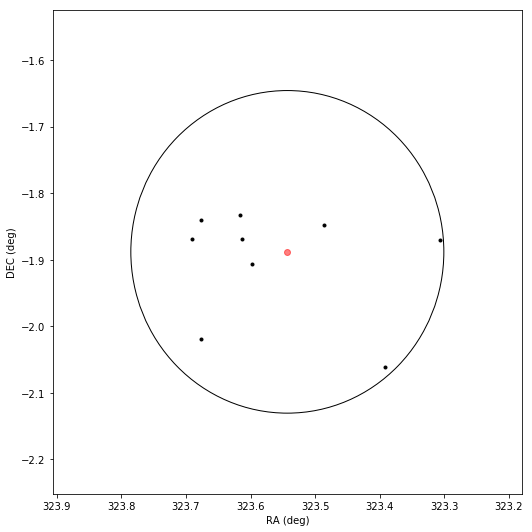

----
4C +00.81
2.249877 674496.0 336.6939 0.86981
1741.4070377375724 0.24676502221238603


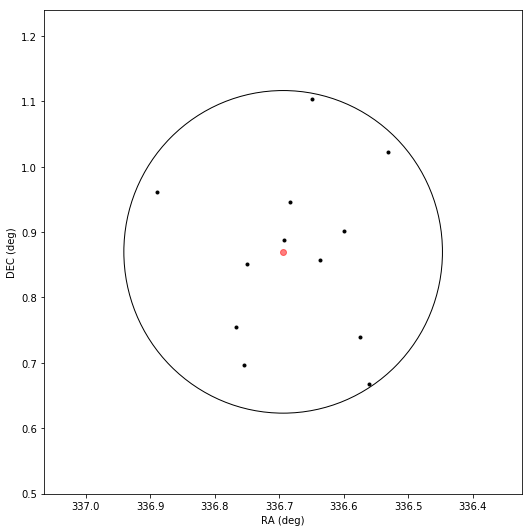

----
LQAC 066+023 001
0.55 164886.0 66.73223 23.46101
1361.9988946301735 0.3155056498520873


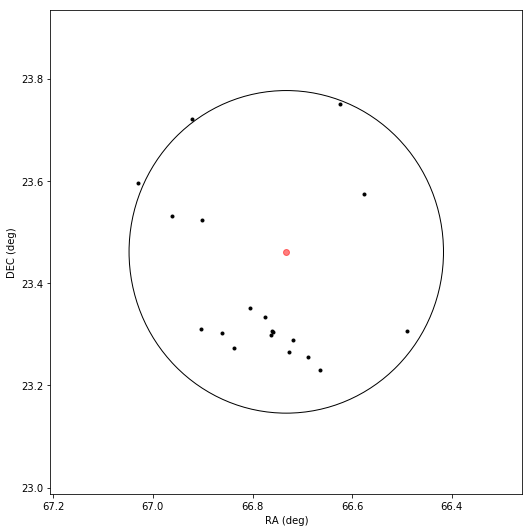

----
PKS 1622-29
0.815 244331.0 246.52509 -29.85749
1602.9924999664522 0.2680725869628901


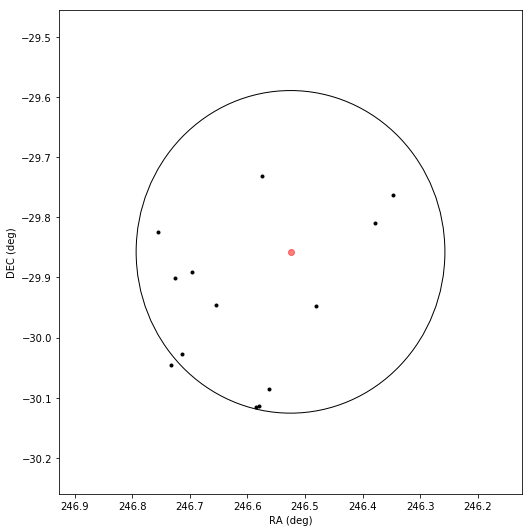

----
PKS 1057-79
0.581 174179.0 164.68046 -80.06504
1398.6384248097584 0.3072404838345317


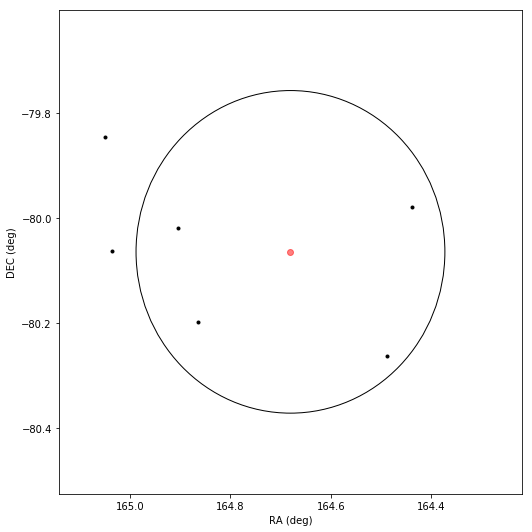

----


In [4]:
# objlist = ['J0541-0211', 'J1733-3722', 'J1610-3958', 'J1743-0350', 'J2253+1608', 
#            'J1851+0035', 'J0541-0541', 'J0601-7036', 'J1130-1449', 'J1305-4928', 
#            'J0336+3218', 'J0006-0623', 'J1717-3342', 'J1833-210B', 'J0237+2848', 
#            'J0750+1231', 'J1751+0939', 'J0948+0022', 'J1107-4449', 'J1256-0547', 
#            'J1830+0619', 'J1225+1253',
#            'J0747-3310', 'J1516+1932', 'J0438+3004', 'J2134-0153', 'J2226+0052', 
#            'J0426+2327', 'J1626-2951', 'J1058-8003']


objlist = ['WISE J161021.87-395858.4', '[HB89] 1741-038', '3C 454.3', 'PKS 0539-057', 'PKS 0601-70', 'SSTSL2 J113006.83-144912.6',
          'NGC 4945', '[HB89] 0333+321 ABS01', 'PKS 0003-066', 'PKS 1830-21', '[HB89] 0234+285', '[HB89] 0748+126',
          '[HB89] 1749+096', 'WISE J094857.31+002225.6', '[HB89] 1104-445', '3C 279', 'WISE J183005.92+061915.7', 
          'MESSIER 084', '[HB89] 1514+197', 'LQAC 069+030 001', '[HB89] 2131-021', '4C +00.81', 'LQAC 066+023 001',
          'PKS 1622-29', 'PKS 1057-79']

# typical size (diameter) of galaxy cluster => 2 - 10 Mpc
tangential_dist = 7.5 # Mpc 


for obj in objlist:
    objname = obj #'PKS ' + obj
    try:
        print(objname)
        z, v0, ra, dec = ga.queryobject_byname(objname)
        print(z, v0, ra, dec)

        obj_coord = coordinates.SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg))

        dA, theta = ga.calc_dA_theta(z, tangential_dist)
        print(dA, theta)
        
        result = Irsa.query_region(objname, catalog="fp_xsc", spatial="Cone", radius= theta * u.deg)
        
        plot_cone(obj_coord, theta, result, savefig=True, imgname=objname + '.extended.png')
        
        print("----")
        
    except:
        print("error! maybe can not identify from name") 
        print("----")